<b>Vinicius F. Caridá</b>

<h1 style="text-align:center"> Machine Learning Hands-On </h1>

<h3 class="title"> Links úteis: </h3>
<br>
<ol>
  <li class="item"><a href = "http://scikit-learn.org/stable/"> Sklearn</a>: principal biblioteca de aprendizado de máquina para python.</li>
  <li class="item"><a href = "http://pandas.pydata.org/pandas-docs/stable/"> Pandas</a>: (quase) tudo o que você precisa para trabalhar rapidamente com tabelas</li>
  <li class="item"><a href = "https://docs.scipy.org/doc/numpy/reference/index.html"> Numpy</a>: funções matemáticas estão aqui</li>
  <li class="item"><a href = "https://matplotlib.org/contents.html"> Matplotlib</a>: te ajuda a plotar!</li>
  <li class="item"><a href = "https://seaborn.pydata.org/api.html"> Seaborn</a>: Deixa a matplotlib bonita (contém plots mais bem estruturados)</li>
</ol>

<b>Trabalharemos com as seguintes bases de dados:</b>
- iris.csv
- lenses_final.csv
- car.data
- horse-colic.data
- PETR4.SA.csv
- Boston.csv
- artificial_data

<b>Testem a leitura de um dos arquivos deste curso</b>
- Acessem a documentação da função <i>read_csv</i> do <i>pandas</i>: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html

In [19]:
import numpy as np 
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid', {"axes.grid" : False})
sns.set_context('notebook')
np.random.seed(42)

In [20]:
iris            = pd.read_csv("./data/iris.csv")
lenses          = pd.read_csv("./data/lenses_final.csv")
car             = pd.read_csv("./data/cars.csv")
horsecolic      = pd.read_table("./data/horse-colic.data")

C:\Users\vinicius\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  after removing the cwd from sys.path.


<h1 style="text-align:center"> Agrupamento </h1>

<h2 style="text-align:center; margin:40px"> Qual o melhor agrupamento para os personagens abaixo?</h2>

![](img/simpsons1.png)

<h2 style="text-align:center; margin:40px"> Existem diversos agrupamentos que fazem sentido... </h2>
<h3 style="text-align:center; margin:40px"> Grupo / Cluster é um conceito subjetivo </h3>

![](img/simpsons2.png)

<p style="margin-bottom:3cm;"></p>

![](img/simpsons4.png)
<p style="margin-bottom:1cm;"></p>
<b> Objetivo: </b> Encontrar grupos tais que <b>elementos similares são posicionados no mesmo grupo e elementos dissimilares são posicionados em grupos diferentes</b>.
<p style="margin-bottom:1cm;"></p>
<ul>
<li><b> Algoritmos Particionais: </b> Constroem uma partição dos dados ![](img/particionais.png)</li>
<p style="margin-bottom:1cm;"></p>
<li><b> Algoritmos Hierárquicos: </b> Constroem uma hierarquia de partições ![](img/hierarquicos.png)</li>
</ul>

<h2 style="margin-bottom:3cm;text-align:center"> Algoritmos Particionais: K-Means</h2>

![](img/objetivo_agrupamento.png)
<h4 style="text-align:center;">Seja $K$ o número escolhido de clusters e $C_k$ o $k$-ésimo cluster, então queremos:</h4>
<h2 style="text-align:center;">$$\min{\sum_{k=1}^{K}\sum_{x \in C_k}||x - \bar{x}_k||^2}$$</h2>
<h4 style="text-align:center;">Onde $\bar{x}_k$ é o centroide do grupo $k$</h4>
<h2 style="text-align:center;">$$\bar{x}_k = \frac{1}{|C_k|}\sum_{x \in C_k} x$$</h2>
<h4 style="text-align:center;">A equação acima é geralmente chamada de <i>within cluster sum of squares</i></h4>

<p style="margin-bottom:1cm;"></p>
<h2 style="text-align:center;">Como minimizar?</h2>
<p style="margin-bottom:1cm;"></p>
<b>K-Means:</b> algoritmo de agrupamento <b>particional</b> cujo objetivo é particionar $n$ objetos em $k$ grupos onde cada objeto pertence ao grupo cujo centroide está mais próximo.

<b> Pseudo-código: </b>
```python
-- Particiona os objetos de entrada em K grupos
função K-Means(objetos, K):
    Inicialize K centroides {k1, k2, ..., kn} aleatoriamente
    Enquanto não houver convergência:
        Atribua cada objeto para o cluster cujo centroide está mais próximo
        Recalcule cada centroide como a média dos objetos do seu grupo
```
<h4 style="text-align:center;">Exemplo de iteração do K-Means</h4>
![](img/kmeans1.png)

<h3> Problema: </h3> Minimizar o <i>within cluster sum of squares</i> é um <b>problema NP-Completo</b>.
<ul>
    <li>Não existe algoritmo exato eficiente para resolver o problema! K-Means é apenas uma aproximação.</li>
    <li>O resultado pode variar significativamente dependendo da escolha dos centroides iniciais.</li>
    <li>O K-Means pode ficar "preso" em ótimos locais.</li>
</ul>

![](img/kmeans_bad.png)

<h3> Algumas possibilidades para contornar tais problemas: </h3>
<ul>
    <li><b>Multiplas execuções (inicializações aleatórias):</b> Funciona bem em muitos problemas porém pode demandar muitas execuções (especialmente com K alto).</li>
    <li><b>Agrupamento hierárquico:</b> Agrupa-se uma amostra dos dados para tomar os centros da partição com K grupos.</li>
    <li><b>K-Means++:</b> Selecionar o 1º centroide como um objeto aleatório, e sucessivamente, escolhe-se o próximo centroide aleatoriamente com probabilidade proporcional à distância entre este centroide e o centroide mais próximo que já foi selecionado.</li>
</ul>

![](img/kmeans_bad_2.png)

<h3> Cenário ideal para o funcionamento do K-Means: </h3>
<ul>
    <li>Clusters são (hiper)esféricos e bem separados</li>
    <li>Clusters têm variância aproximadamente igual</li>
    <li>Clusters têm quantidade de pontos semelhantes</li>
    <li>Dimensões (colunas) possuem a mesma variância</li>
</ul>

<h2 style="text-align:center; margin:40px"> Prática </h2>

Agora iremos executar o K-Means na prática. Primeiro, vamos dar uma olhada nas bases de dados:

In [21]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid', {"axes.grid" : False})
sns.set_context('notebook')
np.random.seed(42)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


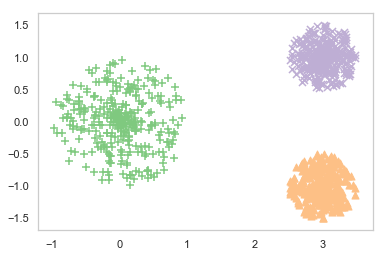

In [22]:
baseDados = pd.read_csv('data/base_agrupamento_1.csv')

markers = {1 : '+', 2 : 'x', 3 : '^'}
for clu in baseDados.clu.unique():
    plt.scatter(baseDados.X[baseDados.clu == clu],
                baseDados.Y[baseDados.clu == clu],
                s = 50,
                marker = markers[clu],
                c = plt.cm.Accent.colors[clu - 1])

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


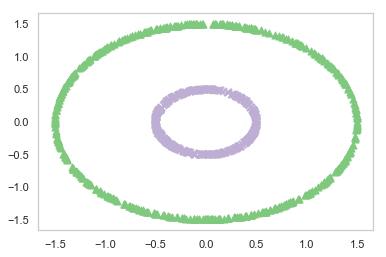

In [23]:
baseDados = pd.read_csv('data/base_agrupamento_2.csv')

markers = {1 : '^', 2 : 'x'}
for clu in baseDados.clu.unique():
    plt.scatter(baseDados.X[baseDados.clu == clu],
                baseDados.Y[baseDados.clu == clu],
                s = 50,
                marker = markers[clu],
                c = plt.cm.Accent.colors[clu - 1])

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


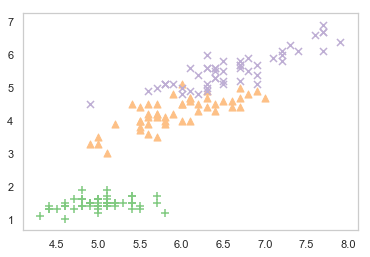

In [24]:
baseDados = pd.read_csv('data/iris.csv')

markers = {'setosa' : '+', 'virginica' : 'x', 'versicolor' : '^'}
colors = {'setosa' : 0, 'virginica' : 1, 'versicolor' : 2}
for clu in baseDados.species.unique():
    plt.scatter(baseDados['sepal length (cm)'][baseDados.species == clu],
                baseDados['petal length (cm)'][baseDados.species == clu],
                s = 50,
                marker = markers[clu],
                c = plt.cm.Accent.colors[colors[clu]])

<h3> Scikit-Learn </h3>
Agora, vamos rodar os códigos abaixo que usam uma implementação do algoritmo disponível no pacote <i>sklearn</i> (Scikit-Learn). Iremos rodar o código passo a passo para podermos visualizar os centroides em cada iteração.

In [25]:
from sklearn.cluster import KMeans

Primeiro lemos a base, inicializamos centroides aleatórios e preparamos as variáveis <i>xx</i> e <i>yy</i> que serão usadas para colorir a área que pertence à cada cluster na visualização

In [26]:
np.random.seed(42)
baseDados = pd.read_csv('data/base_agrupamento_1.csv')
X = baseDados[['X','Y']]
centers = np.array([[np.random.uniform(baseDados.X.min(), baseDados.X.max()),
            np.random.uniform(baseDados.Y.min(), baseDados.Y.max())] for i in range(3)])

h = .005
x_min, x_max = baseDados.X.min() - 1, baseDados.X.max() + 1
y_min, y_max = baseDados.Y.min() - 1, baseDados.Y.max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Agora treinamos o algoritmo K-Means e exibimos a posição dos centroides a cada iteração

Se executarmos o algoritmo várias vezes, iremos perceber que os <b>resultados variam</b>, e eventualmente o algoritmo cai em um <b>ótimo local</b>!

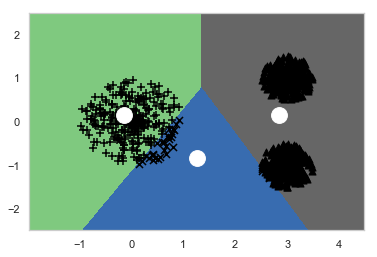

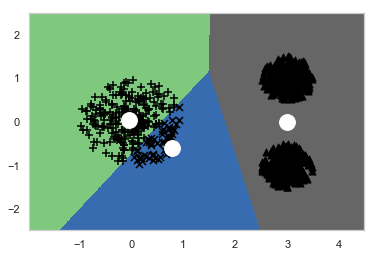

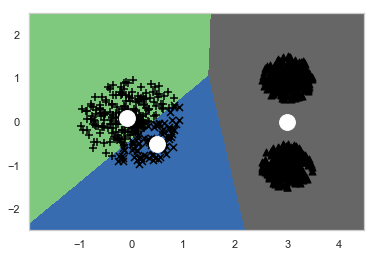

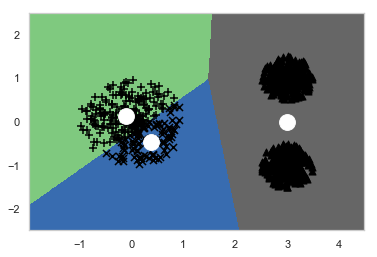

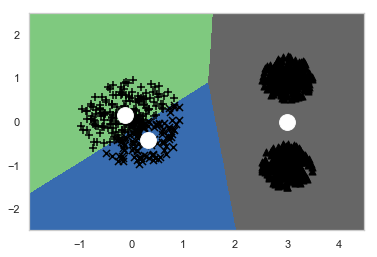

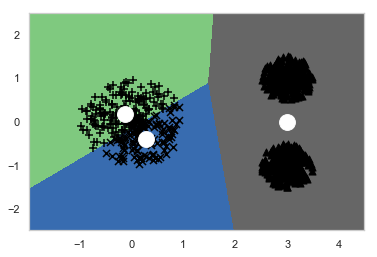

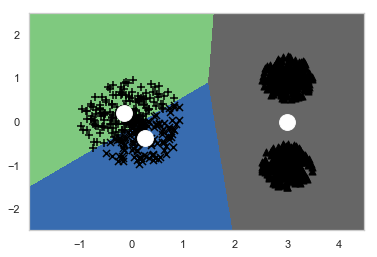

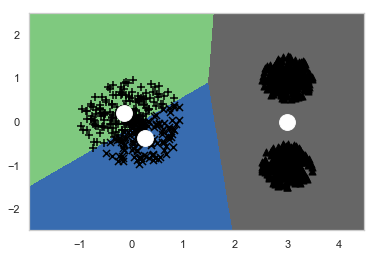

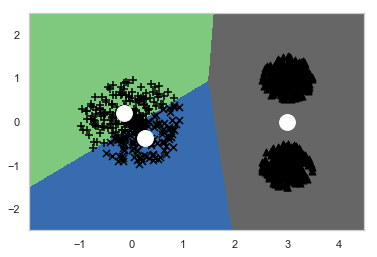

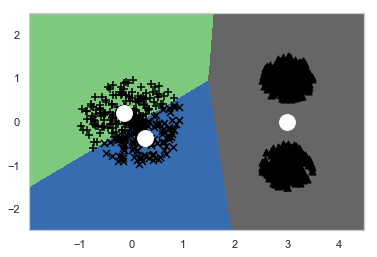

In [27]:
for _ in range(10):
    km = KMeans(n_clusters = 3, n_init = 1, init = centers, max_iter=1)
    baseDados['kmeans'] = km.fit_predict(X)
    
    # Nesta parte imprimimos a area colorida no fundo
    Z = km.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.figure(1)
    plt.clf()
    plt.imshow(Z, interpolation='nearest',
               extent=(xx.min(), xx.max(), yy.min(), yy.max()),
               cmap=plt.cm.Accent,
               aspect='auto', origin='lower')

    # Nesta parte imprimimos os pontos
    markers = {0 : '+', 1 : 'x', 2 : '^'}
    for clu in baseDados.kmeans.unique():
        plt.scatter(baseDados.X[baseDados.kmeans == clu],
                    baseDados.Y[baseDados.kmeans == clu],
                    s = 50,
                    marker = markers[clu],
                    c = 'black')

    for centroide in km.cluster_centers_:
        plt.scatter(centroide[0], centroide[1], s = 250, c = 'white')
    centers = km.cluster_centers_
    plt.show()

Executando com o <b>k-means++</b> e mais de uma inicialização, garantimos o melhor agrupamento para este conjunto de dados

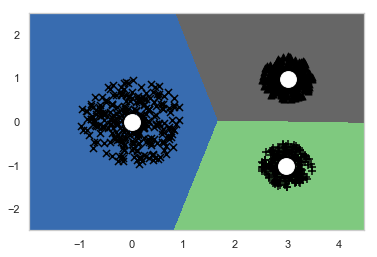

In [28]:
km = KMeans(n_clusters = 3, n_init = 3, init = 'k-means++', max_iter=300)
baseDados['kmeans'] = km.fit_predict(X)

# Nesta parte imprimimos a area colorida no fundo
Z = km.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Accent,
           aspect='auto', origin='lower')

# Nesta parte imprimimos os pontos
markers = {0 : '+', 1 : 'x', 2 : '^'}
for clu in baseDados.kmeans.unique():
    plt.scatter(baseDados.X[baseDados.kmeans == clu],
                baseDados.Y[baseDados.kmeans == clu],
                s = 50,
                marker = markers[clu],
                c = 'black')

for centroide in km.cluster_centers_:
    plt.scatter(centroide[0], centroide[1], s = 250, c = 'white')
centers = km.cluster_centers_
plt.show()

Na segunda base de dados, o KMeans não conseguirá agrupar os dados da forma que desejamos, não importa como ele for ajustado

In [29]:
baseDados = pd.read_csv('data/base_agrupamento_2.csv')
X = baseDados[['X','Y']]

h = .005
x_min, x_max = baseDados.X.min() - 1, baseDados.X.max() + 1
y_min, y_max = baseDados.Y.min() - 1, baseDados.Y.max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

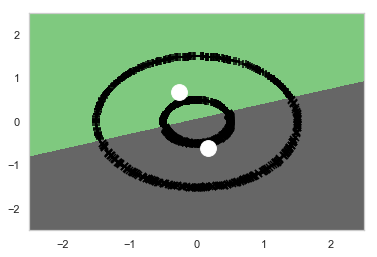

In [30]:
km = KMeans(n_clusters = 2, n_init = 3, init = 'k-means++', max_iter=300)
baseDados['kmeans'] = km.fit_predict(X)

# Nesta parte imprimimos a area colorida no fundo
Z = km.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Accent,
           aspect='auto', origin='lower')

# Nesta parte imprimimos os pontos
markers = {0 : '+', 1 : 'x', 2 : '^'}
for clu in baseDados.kmeans.unique():
    plt.scatter(baseDados.X[baseDados.kmeans == clu],
                baseDados.Y[baseDados.kmeans == clu],
                s = 50,
                marker = markers[clu],
                c = 'black')

for centroide in km.cluster_centers_:
    plt.scatter(centroide[0], centroide[1], s = 250, c = 'white')
centers = km.cluster_centers_
plt.show()

Vamos entender melhor como utilizar o algoritmo na prática

Primeiro precisamos criar o objeto <b>KMeans</b> com os seguintes parâmetros:
<ul>
    <li><b>n_clusters:</b> Número de clusters desejados (K)</li>
    <li><b>n_init:</b> Número de inicializações aleatórias. O padrão é 10.</li>
    <li><b>init:</b> Método de inicialização. O padrão é 'k-means++'. Também podemos optar por 'random' ou passar uma lista de centroides.</li>
    <li><b>max_iter:</b> Número máximo de iterações. O padrão é 300. Geralmente o algoritmo converge bem antes disso.</li>
</ul>

In [31]:
km = KMeans(n_clusters = 3, n_init = 10, init = 'k-means++', max_iter = 300)

Então devemos <b>treinar o algoritmo</b>, ou seja, calibrar os centroides, utilizando a função <b>fit</b>

In [32]:
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

Finalmente podemos <b>atribuir um cluster</b> para cada ponto com a função <b>predict</b>

In [33]:
baseDados['kmeans'] = km.predict(X)
baseDados.head()

,X,Y,clu,kmeans
0,-1.00,1.12,1,2
1,-0.22,-1.48,1,0
2,-0.98,-1.14,1,2
3,0.48,1.42,1,1
4,-0.51,-1.41,1,0


Caso precisemos dos <b>centroides</b>, podemos resgatá-los com o atributo <b>cluster\_centers\_</b>

In [34]:
km.cluster_centers_

array([[ 0.40146814, -0.72299169],
       [ 0.29182109,  0.80383387],
       [-0.81996933,  0.00745399]])

In [35]:
# Centroide do cluster k
k = 0
km.cluster_centers_[k, :]

array([ 0.40146814, -0.72299169])

<h2 style="margin-bottom:1cm;text-align:center"> Prática </h2>

Agora vamos executar os algoritmos de agrupamento na base iris, interpretando e visualizando os resultados.

<b>Guidelines:</b>
<ul>
    <li>Vamos utilizar o PCA para projetar os dados em 2 dimensões</li>
    <li>Para o KMeans, vamos testar com diferentes números de clusters e diferentes métodos de inicialização</li>
    <li>Para os métodos hierárquicos, vamos testar com diferentes funções de ligação e visualizar os dendrogramas para determinar o K ideal</li>
</ul>

In [36]:
# Programe aqui